GAUSS SEIDEL

In [1]:
import numpy as np

In [2]:
Xs = [
    [
        [4 , 2, -1],
        [1, -5, 2],
        [2, -1, -4]
    ],
    [
        [3, 4, 5],
        [-3, 7, -4],
        [1, -4, -2]
    ],
    [
        [9, -2, 3, -2],
        [2, 8, -2, 3],
        [-3, 2, 11, -4],
        [-2, 3, 2, 10]
    ]
]

Ys = [
    [41, -10, 1],
    [34, -32, 62],
    [55, -14, 12, -21]
]

In [3]:
def is_diagonally_dominant(x):
  x = np.array(x)
  x_abs = np.abs(x)
  diag = np.array(np.diag(x_abs))

  np.fill_diagonal(x_abs, 0)
  sum_diag = np.sum(x_abs, axis = 1)

  return np.all(diag > sum_diag)

In [4]:
def gauss_seidel(x, y, error=0.01):
  if not is_diagonally_dominant(x):
    print("Matrix is not diagonally dominant")
    return

  x = np.array(x)
  y = np.array(y)

  diag = np.array(np.diag(x))
  np.fill_diagonal(x, 0)

  res = np.zeros(diag.shape)
  max = 100

  for iter in range(max):
    res_new = np.array(res)

    for idx, row in enumerate(x):
      res_new[idx] = (y[idx]-(np.dot(row,res_new)))/diag[idx]

    print(f"Iteration {iter}: {res_new}")

    diff = np.sqrt(np.dot(res_new - res, res_new - res))
    if(diff<error):
      print("Answer: ", res_new)
      return

    res = res_new

In [5]:
x =[[8, 3, 2],[2, 7, 3],[-3, 2, 12]]
y =[121, 82, 34]

gauss_seidel(x, y)

Iteration 0: [15.125       7.39285714  5.38244048]
Iteration 1: [11.00706845  6.26264881  4.54132564]
Iteration 2: [11.64117529  6.44195321  4.66996829]
Iteration 3: [11.54177547  6.4152206   4.64957377]
Iteration 4: [11.55689883  6.41964015  4.65261802]
Iteration 5: [11.55448044  6.41902644  4.6521157 ]
Answer:  [11.55448044  6.41902644  4.6521157 ]


Least Square Regression

In [6]:
import matplotlib.pyplot as plt

In [7]:
x = [
0.667257363,
1.163272104,
2.059775843,
3.026043396,
3.823459252,
4.237522149,
5.175051771,
5.274506600,
6.244287409,
6.542814643,
7.055059567,
7.390116752,
8.288971198,
8.579231789,
9.210386935,
9.620823117,
10.25700941,
10.89194207,
11.21369076,
11.41558731,
11.84950537,
12.41654640,
13.07341967,
13.93756043,
13.96383483,
14.49473702,
14.90972704,
15.07248603,
15.79685930,
16.65678362,
17.30883901,
17.35006975,
17.58938929,
17.79778379,
18.00169342,
18.48060630,
18.71248139,
19.11376774,
19.39409803,
19.74650750,
20.74546216,
21.01455518,
21.69457689,
22.33519718,
23.26208851,
23.97298783,
24.60252331,
25.28542718,
25.36556687,
25.43342769,
]
y = [
69.61612841,
70.31009462,
70.52967130,
70.69226554,
71.26272117,
72.19410464,
72.75925445,
73.48095621,
74.32835598,
75.00604086,
75.81053537,
76.18342777,
76.26701376,
76.88125364,
76.88850065,
77.20628611,
77.99029850,
78.41087441,
79.33575636,
79.98614235,
80.62260103,
81.46225811,
81.97599388,
82.40526228,
82.75687635,
83.19695143,
83.22854080,
84.05539698,
84.18519963,
84.20141506,
84.96388936,
85.96117288,
86.20746789,
86.59131925,
87.14506062,
87.80712240,
88.51922370,
88.82890416,
89.52846481,
90.37898232,
90.98286205,
91.47855750,
91.71240983,
91.87073017,
91.94818226,
92.59044238,
93.44106750,
93.50315021,
94.20888309,
94.39807859,
]

In [8]:
x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
Y = y[:, np.newaxis]

A_pinv = np.linalg.pinv(A)
inv = np.dot(A_pinv, Y)

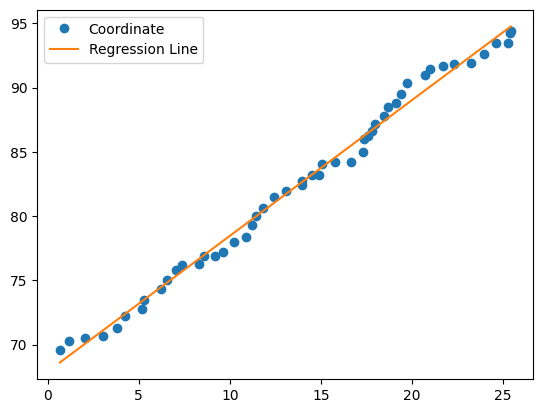

In [9]:
plt.plot(x, y, "o")
plt.plot(x, inv[0]*x + inv[1])
plt.legend(["Coordinate", "Regression Line"])
plt.show()

NEWTON RAPHSON

In [10]:
def f(x):
  return 3*x**3 + 7*x**2 + 3*x - 1

def g(x):
  return 9*x**2 + 14*x + 3

def newton_raphson(x0, iter, error = 0.001, max = 100):
  if iter >= max:
    print("max iteration has been reached")
    return

  x1 = x0 - f(x0)/g(x0)
  print(f"Iteration {iter}: {x1}")


  if np.abs(f(x1)) <= error:
    print(f"root is found at {x1}")
    return

  newton_raphson(x1, iter+1)

newton_raphson(-1.25, 0)

Iteration 0: -0.5
Iteration 1: -1.1428571428571428
Iteration 2: -0.9531615925058545
Iteration 3: -0.9982602315126992
Iteration 4: -0.9999969994031928
root is found at -0.9999969994031928


INTEGRAL RIEMMAN

In [11]:
def f(x):
  return 2*x**2 - 7*x - 8

n = 4
x_left = 0
x_right = 8

space = np.linspace(x_left, x_right, n)
width = space[1] - space[0]

In [12]:
#left riemman
area = width*np.sum(f(space[0:n-1]))

#right riemman
area = width*np.sum(f(space[1:n]))

#mid riemman
x_mid = (space[0:n-1] + space[1:n])/2
area = width*np.sum(f(x_mid))

In [13]:
total_sisi = f([0]) + f(point_x[n-1]) + np.sum(2*f(point_x[1:n-1]))

area = width/2 * total_sisi
print(area)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'